### Modeling on the data obtained through the survey - 57 employees

In [ ]:
#### importing the required packages
import pandas as pd
import numpy as np
import pandas
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from collections import Counter

from sklearn import preprocessing
from sklearn.utils import resample
from imblearn import over_sampling as os
from imblearn.over_sampling import SMOTE
from imblearn import pipeline as pl
from imblearn.metrics import (geometric_mean_score,make_index_balanced_accuracy)
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from xgboost.sklearn import XGBClassifier 
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,matthews_corrcoef

In [ ]:
hr_data = pd.read_excel('data/HR-Employee-Attrition.xlsx') #### read in the excel data
val_data = pd.read_csv('data/Job Satisfaction Survey.csv') #### read in the survey data

In [ ]:
val_data.head(4)

In [ ]:
# assigning columns names to the survey data
val_data.columns = ['Timestamp','Age','BusinessTravel','Department','DistanceFromHome','Education','EducationField','EnvironmentSatisfaction',
                   'Gender','JobInvolvement','JobRole','JobSatisfaction','MaritalStatus','MonthlyIncome','NumCompaniesWorked','OverTime',
                   'PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear',
                   'WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','n1','n2']

In [ ]:
#val_data = val_data.drop(['n1','n2'],axis=1) # dropping unwanted columns
#val_data.DistanceFromHome = val_data.DistanceFromHome.str.strip() # stripof white spaces 

In [ ]:
val_data.DistanceFromHome.value_counts()

In [ ]:
# correcting error values
#val_data.DistanceFromHome[val_data.DistanceFromHome == '0'] = '1'
#val_data.DistanceFromHome[val_data.DistanceFromHome == '0.2'] = '1'
#val_data.DistanceFromHome[val_data.DistanceFromHome == '3.5'] = '4'
#val_data.DistanceFromHome[val_data.DistanceFromHome == '45 minutes'] = '30'
#val_data.DistanceFromHome[val_data.DistanceFromHome == '4 miles'] = '4'
#val_data.DistanceFromHome[val_data.DistanceFromHome == '500'] = '5'

In [ ]:
pandas.set_option('display.max_columns',None) # set the option to display all the columns of a dataframe....

In [ ]:
cols_to_remove = ['EmployeeCount','Over18','StandardHours','EmployeeNumber','JobLevel','DailyRate','MonthlyRate','HourlyRate'] ### remove the unnecessary columns
hr_data = hr_data.drop(hr_data[cols_to_remove],axis=1)
len(hr_data.columns)

In [ ]:
hr_data.shape

In [ ]:
hr_data.columns

In [ ]:
val_data.columns


In [ ]:
val_data['Attrition'] = 0 # adding the target variable column
val_data = val_data.drop('Timestamp',axis=1) # drop the timestamp

In [ ]:
# creating a list of categorical variables
cat_var = ['BusinessTravel','Department','Education','EducationField','EnvironmentSatisfaction','JobInvolvement','Gender','JobRole','JobSatisfaction',
'MaritalStatus','OverTime','PerformanceRating','RelationshipSatisfaction','WorkLifeBalance','StockOptionLevel']
# creating a list of numeric variables
int_var = ['Age','DistanceFromHome','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears',
          'TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']


In [ ]:
# converting the object data type to category dtype
for var in cat_var:
    hr_data[var] = hr_data[var].astype('category')
    val_data[var] = val_data[var].astype('category')
# converting into int data type
for var in int_var:
    val_data[var] = val_data[var].astype('int64')
hr_data['Attrition'] = hr_data['Attrition'].astype('category')
val_data['Attrition'] = val_data['Attrition'].astype('category')

In [ ]:
val_data[~val_data.applymap(np.isreal).all(1)] ## irrelevant values in the dataframe

In [ ]:
#val_data.PercentSalaryHike[val_data.PercentSalaryHike == 999999] = 9
#val_data.MonthlyIncome[val_data.MonthlyIncome == 200000] = 16000
#val_data.MonthlyIncome[val_data.MonthlyIncome == 60000] = 10000
#val_data.MonthlyIncome[val_data.MonthlyIncome == 70000] = 7000
#val_data.MonthlyIncome[val_data.MonthlyIncome == 47000] = 15000
#val_data.MonthlyIncome[val_data.MonthlyIncome == 70000] = 6000
#val_data.MonthlyIncome[val_data.MonthlyIncome == 1] = 4000
#val_data.MonthlyIncome[val_data.MonthlyIncome == 50000] = 15000




In [ ]:
### creating a new dataframe with all categorical descriptions
hr_desc = hr_data.copy()
val_data1 = val_data.copy()

In [ ]:
#### mapping all data with those description so as to analyze
Education_desc = {1 : 'Below College', 2 : 'College' , 3 : 'Bachelor' , 4 : 'Master' , 5 : 'Doctor'}
EnvironmentSatisfaction_desc = {1 : 'Low' , 2 : 'Medium' , 3 : 'High' , 4 : 'Very High'}
JobInvolvement_desc  = {1 : 'Low' , 2 : 'Medium' , 3 : 'High' ,4 : 'Very High'}
JobSatisfaction_desc = {1 : 'Low' , 2 : 'Medium' , 3 : 'High' ,4 : 'Very High'}
PerformanceRating_desc = {1 :'Low' , 2 : 'Good' , 3 : 'Excellent' , 4 : 'Outstanding'}
RelationshipSatisfaction_desc  = {1 : 'Low' , 2 : 'Medium' , 3 : 'High' ,4 : 'Very High'}
WorkLifeBalance_desc = {1 : 'Bad' , 2 : 'Good' , 3 : 'Better' ,4 : 'Best'}


In [ ]:
# mapping the numbers to its description 
hr_desc['Education'].replace(Education_desc,inplace=True)
hr_desc['EnvironmentSatisfaction'] = hr_desc['EnvironmentSatisfaction'].map(EnvironmentSatisfaction_desc)
hr_desc['JobInvolvement'] = hr_desc['JobInvolvement'].map(JobInvolvement_desc)
hr_desc['JobSatisfaction'] = hr_desc['JobSatisfaction'].map(JobSatisfaction_desc)
hr_desc['PerformanceRating'] = hr_desc['PerformanceRating'].map(PerformanceRating_desc)
hr_desc['RelationshipSatisfaction'] = hr_desc['RelationshipSatisfaction'].map(RelationshipSatisfaction_desc)
hr_desc['WorkLifeBalance'] = hr_desc['WorkLifeBalance'].map(WorkLifeBalance_desc)

In [ ]:
#mapping the numbers to its description
val_data1['Education'].replace(Education_desc,inplace=True)
val_data1['EnvironmentSatisfaction'] = hr_desc['EnvironmentSatisfaction'].map(EnvironmentSatisfaction_desc)
val_data1['JobInvolvement'] = hr_desc['JobInvolvement'].map(JobInvolvement_desc)
val_data1['JobSatisfaction'] = hr_desc['JobSatisfaction'].map(JobSatisfaction_desc)
val_data1['PerformanceRating'] = hr_desc['PerformanceRating'].map(PerformanceRating_desc)
val_data1['RelationshipSatisfaction'] = hr_desc['RelationshipSatisfaction'].map(RelationshipSatisfaction_desc)
val_data1['WorkLifeBalance'] = hr_desc['WorkLifeBalance'].map(WorkLifeBalance_desc)

In [ ]:
obj_cols =hr_desc.select_dtypes(include=['object'])
obj_cols1 =val_data1.select_dtypes(include=['object'])
for var in obj_cols:
    hr_desc[var] = hr_desc[var].astype('category') ### there are 17 categorical columns and 14 int columns
for var1 in obj_cols1:
    val_data1[var] = val_data1[var].astype('category')

###  Pandas has a function which can turn a categorical variable into a series of zeros and ### ones, which makes them a lot easier to quantify and compare.(get_dummies)

In [ ]:
# creating dummies for cat columns   -- one hot encoding  
for var in cat_var:
    cat_list = 'var' + '_' +var
    cat_list = pd.get_dummies(hr_desc[var],prefix=var)
    hr1 =hr_desc.join(cat_list)
    hr_desc = hr1
# creating dummies for cat columns   -- one hot encoding  
for var in cat_var:
    cat_list = 'var' + '_' +var
    cat_list = pd.get_dummies(val_data1[var],prefix=var)
    hr1 =val_data1.join(cat_list)
    val_data1 = hr1

In [ ]:
len(hr_desc.columns)

In [ ]:
len(val_data1.columns)

In [ ]:
# creating a list of variables
hr_vars=hr_desc.columns.values.tolist()
to_keep=[i for i in hr_vars if i not in cat_var]
print(len(hr_vars))
print(len(to_keep))
hr_final = hr_desc[to_keep] ## 18 columns dropped as dummies were created for them..
hr_final_vars = hr_final.columns.values.tolist() # creating a list of final variables
hr_final.Attrition = hr_final.Attrition.cat.codes

# creating a list of variables
hr_vars1=val_data1.columns.values.tolist()
to_keep=[i for i in hr_vars1 if i not in cat_var]
print(len(hr_vars1))
print(len(to_keep))
val_data1 = val_data1[to_keep] ## 18 columns dropped as dummies were created for them..
val_data1_vars = val_data1.columns.values.tolist() # creating a list of final variables

In [ ]:
hr_final.shape

In [ ]:
val_data1.shape

In [ ]:

#hr_final.Attrition = hr_final.Attrition.cat.codes

In [ ]:
val_data1['Attrition'] = 0
val_data1.Attrition = val_data1.Attrition.astype('category')

In [295]:
# match the columns of the survey data and train data
drop_cols = [col for col in hr_final.columns if col not in val_data1.columns]
hr_final2 = hr_final.drop(drop_cols,axis=1)
drop_cols_val = [col for col in val_data1.columns if col not in hr_final2.columns]
val_data2 = val_data1.drop(drop_cols_val,axis=1)

In [296]:
y = hr_final2['Attrition']
X = hr_final2.drop('Attrition',axis=1) # excluding the target variable Attrition - 70 columns

### normalizing the data before feature selection - min max scaler

In [297]:
val_data2 = val_data2.drop('Attrition',axis=1)

In [298]:
# preprocessing the dataset 
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
df_scaled = pandas.DataFrame(X_scaled) # convert into a dataframe
df_scaled.columns = X.columns # assigning columns names


In [299]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled, y ,test_size = .3,random_state=12) ### train test split the data first

In [300]:
logreg = LogisticRegression() ### instantiating a log reg classifier
rfe = RFE(logreg)     
rfe = rfe.fit(df_scaled , y)
print(rfe.support_) ### the features selected by RFE
print(rfe.ranking_) ### ranking for various features

[ True  True  True  True False  True  True  True  True  True  True  True
 False False False False False False False False False  True False  True
  True False False False False False  True False False False  True  True
  True  True  True False]
[ 1  1  1  1 20  1  1  1  1  1  1  1  2 13 14  5 15  7 18  3 19  1 17  1  1
  4  6 21 12  8  1 10 11 16  1  1  1  1  1  9]


In [301]:
rfe.n_features_ ### number of features selected by rfe is 20

20

In [302]:
### find the columns which has high ranking.... 
cols = df_scaled.loc[:,rfe.support_].columns.tolist()
X = df_scaled[cols]   ### selected features of the model

### upsampling technique

In [303]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size = .3,random_state=12)
print('Original dataset shape {}'.format(Counter(y)))
train_data = X_train ## upsampling done on the training data to avoid leakage.. 
train_data['Attrition'] = y_train
### train_data needs to be upsampled...

train_data_majority = train_data[train_data.Attrition == 0]
train_data_minority = train_data[train_data.Attrition==1]



# Upsample minority class
train_data_minority_upsampled = resample(train_data_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=863,    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
train_upsampled = pd.concat([train_data_majority, train_data_minority_upsampled])

train_upsampled.Attrition.value_counts()

print("upsampled data   :" , train_upsampled.Attrition.value_counts())

### split the training set again
# Separate input features (X) and target variable (y)
X_train = train_upsampled.drop('Attrition' , axis=1)
y_train = train_upsampled.Attrition



Original dataset shape Counter({0: 1233, 1: 237})
upsampled data   : 1    863
0    863
Name: Attrition, dtype: int64


C:\Users\Suhasini\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [304]:
###I transform trainset and use calculations on the testset
### I need to transform validation set by  using calculations on the trainset 
val_data2_scaled = min_max_scaler.transform(val_data2)

In [305]:
df_val_scaled = pandas.DataFrame(val_data2_scaled)
#df_val_scaled.columns = df_scaled.columns

In [306]:
X_cols = X.columns

In [307]:
X_cols

Index(['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Travel_Frequently', 'EducationField_Life Sciences',
       'EducationField_Medical', 'EducationField_Other',
       'JobRole_Research Scientist', 'OverTime_No', 'OverTime_Yes',
       'StockOptionLevel_0', 'StockOptionLevel_1', 'StockOptionLevel_2'],
      dtype='object')

In [308]:
len(val_data2.columns)

40

In [310]:
df_val_scaled.columns = val_data2.columns # assigninig columns names

In [311]:
df_val_scaled = df_val_scaled[X_cols]

In [312]:
len(df_val_scaled.columns)

20

In [313]:
lg_model = logreg.fit(X_train,y_train) # fit on the training data
y_pred = logreg.predict(X_test) # predict on the hold out set ..
y_pred_exp_data = logreg.predict(df_val_scaled)


print("accuracy of logistic regression classifier on test set : {:.2f}".format(logreg.score(X_test,y_test)))
print("---------------")
print("Evaluate model accuracy :" , accuracy_score(y_test,y_pred))
print("---------------")
print("matthews coefficient : " , matthews_corrcoef(y_test,y_pred))
print("---------------")
print(classification_report(y_test,y_pred))
print("---------------")
y_pred_proba = logreg.predict_proba(X_test)[:,1]
print("roc auc score  : " , roc_auc_score(y_test,y_pred_proba) )

print("----------------")
cv_scores = cross_val_score(logreg,X_train,y_train,cv=5,scoring='roc_auc')
print("cross validate scores : " , cv_scores)
print("------------------")

print("Experiment Data Predictions---", y_pred_exp_data)



accuracy of logistic regression classifier on test set : 0.76
---------------
Evaluate model accuracy : 0.761904761905
---------------
matthews coefficient :  0.396283616846
---------------
             precision    recall  f1-score   support

          0       0.94      0.77      0.84       370
          1       0.38      0.73      0.50        71

avg / total       0.85      0.76      0.79       441

---------------
roc auc score  :  0.813856109631
----------------
cross validate scores :  [ 0.84269438  0.77576932  0.76460958  0.8141901   0.85073012]
------------------
Experiment Data Predictions--- [0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1]


In [314]:
sum(y_pred_exp_data)

42

In [315]:
y_pred_exp_data

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int8)

In [317]:
s = pandas.Series(y_pred_exp_data)
df_val_scaled['Attrition'] = s

C:\Users\Suhasini\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [318]:
df_val_scaled.head(4)

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,EducationField_Life Sciences,EducationField_Medical,EducationField_Other,JobRole_Research Scientist,OverTime_No,OverTime_Yes,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,Attrition
0,0.595238,0.178571,0.368141,0.111111,0.500,0.500000,0.250,0.277778,0.266667,0.588235,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0
1,0.142857,0.107143,0.157504,0.222222,0.075,0.166667,0.025,0.055556,0.000000,0.058824,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1
2,0.404762,1.035714,0.473460,0.666667,0.425,0.500000,0.325,0.111111,0.133333,0.058824,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1
3,0.523810,1.392857,0.183834,1.111111,0.625,0.500000,0.050,0.111111,0.000000,0.117647,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1


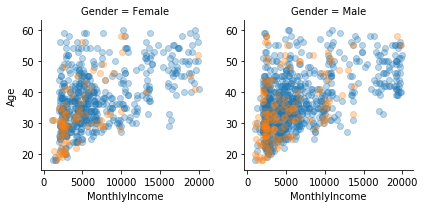

In [319]:
g =sns.FacetGrid(data=hr_desc,col='Gender',hue='Attrition');
g.map(plt.scatter,'MonthlyIncome','Age',alpha=0.3);

In [320]:
val_data['Attrition'] = y_pred_exp_data

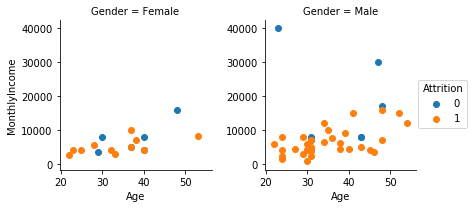

In [322]:
g =sns.FacetGrid(data=val_data,col='Gender',hue='Attrition',legend_out=True);
g=(g.map(plt.scatter,'Age','MonthlyIncome').add_legend());
plt.savefig('survey_data_pred')

In [338]:
### Employees who are 30 year male in the survey data seem to resign .... 

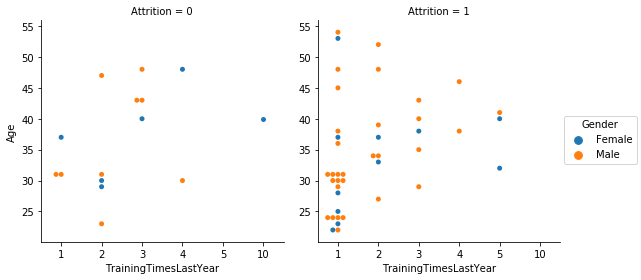

In [336]:
sns.factorplot(data=val_data,x='TrainingTimesLastYear',y='Age', hue ='Gender',col = 'Attrition',kind='swarm');
plt.savefig('TrainingTimesvsAge_valdata')

## It looks employees need more training in order to stick to ther jobs